<a href="https://colab.research.google.com/github/mesnico/DTfH-Laboratory/blob/main/2025/open_set_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratory on Open-Set Image Classification
-----------------

You'll learn to classify images using an open-set classifier (CLIP).

## 3. Classification using a Pretrained Model (open-set)

Closed-set classification models are limited to the learnt categories.

Instead of producing the class scores directly, we can use neural networks for **image features extraction**.
We compare extracted features to ***category prototypes*** to check whether they match.

Specifically, we will explore open-set image classification using the [Contrastive Language-Image Pre-training (CLIP)](https://github.com/openai/CLIP) model by OpenAI.

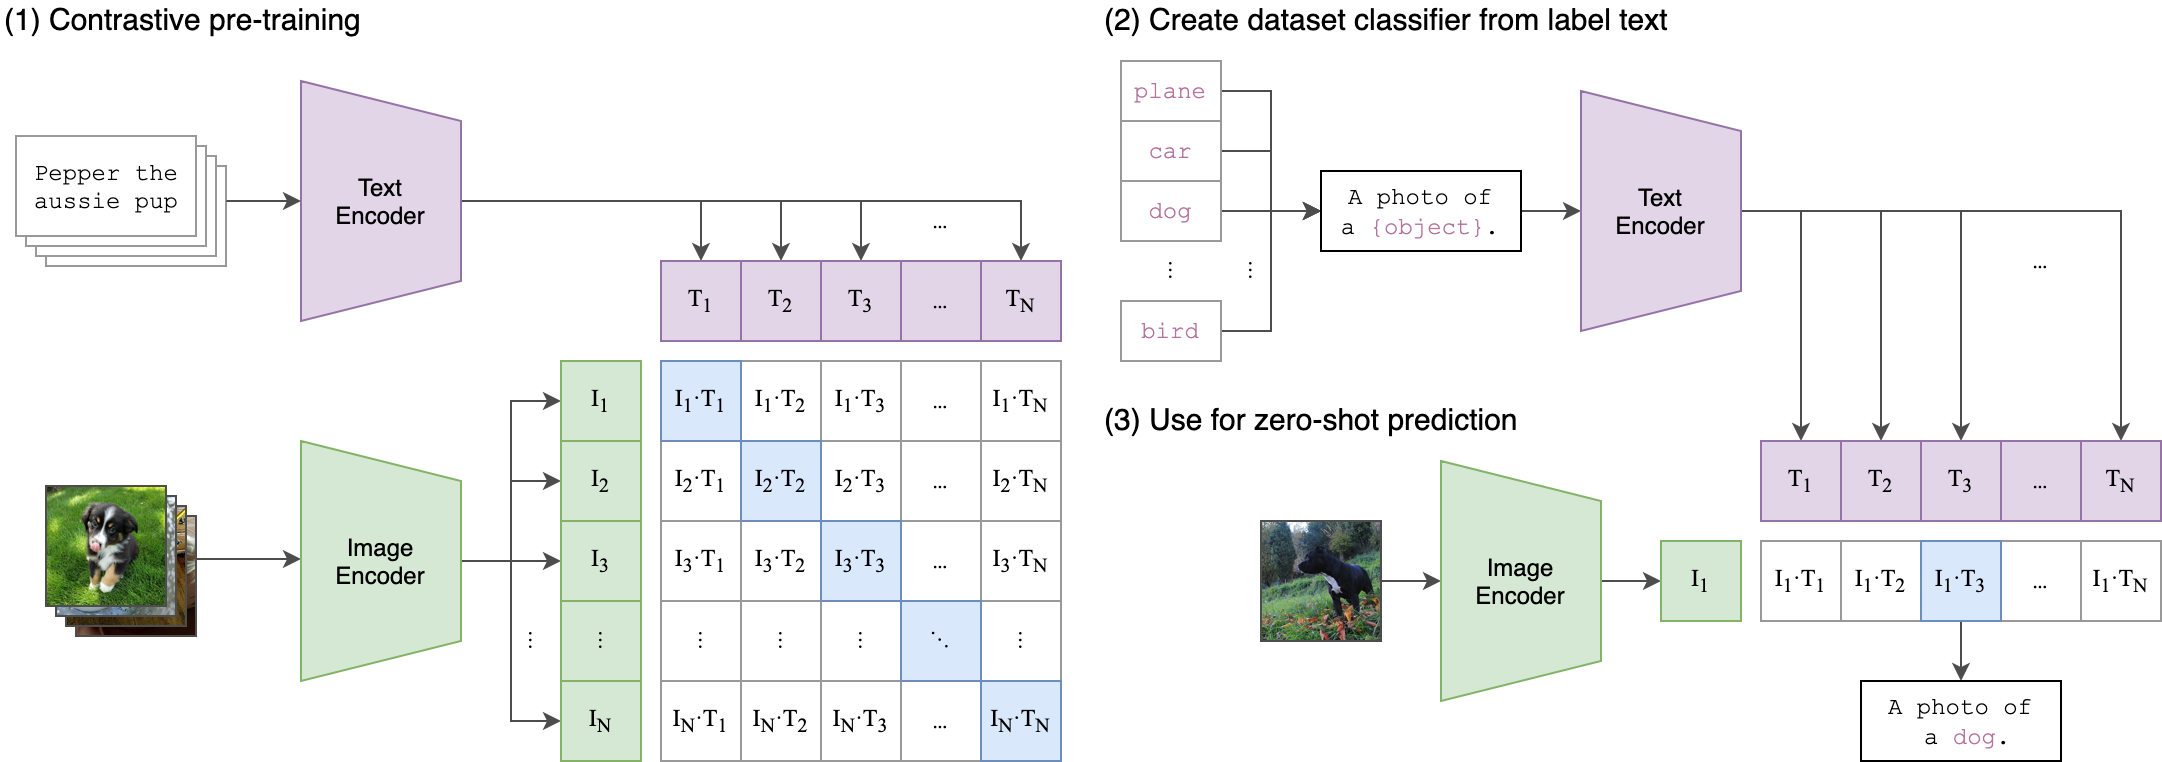

This model is trained

- to extract **representations of images** (image features)
- and **representations of short text sentences** (text features)
- such that those representations **match** when the text describe the image content.

CLIP can be used to match an image to an arbitrary textual description, enabling open-set classification; you can decide the taxonomy you are interest in.

Let's first load our image and then load CLIP from the Hugging Face model hub.

In [ ]:
import PIL

image_path = '/content/immagine.jpg'

# open the image
pil_image = PIL.Image.open(image_path)

# display it on colab (display() is a special Colab function)
display(pil_image)

In [ ]:
from transformers import CLIPProcessor, CLIPModel

model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
preprocess = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

Let's decide a taxonomy of classes we want to match our image against.

In [ ]:
taxonomy = [
  "a photo of a cat",
  "a photo of a dog",
  "a photo of a fox",
  "a photo of a building",
  "a photo of a plant"
]

Now, let's apply the model and inspect its ouputs.

In [ ]:
# preprocess our pil image and the taxonomy to be compatible with the input of the model
inputs = preprocess(text=taxonomy, images=pil_image, return_tensors="pt", padding=True)

# apply the model
outputs = model(**inputs)

The model provides many useful outputs, such as:

In [ ]:
# the learnt representations for our text sentences (taxonomy)
print(outputs.text_embeds)
print(outputs.text_embeds.shape)

In [ ]:
# the learnt representations for our images
print(outputs.image_embeds)
print(outputs.image_embeds.shape)

In [ ]:
# the image-text similarity scores
print(outputs.logits_per_image)

In [ ]:
scores = outputs.logits_per_image

# we can take the softmax to get the label probabilities
probs = scores.softmax(dim=1).detach().numpy().squeeze()

for prob, category in zip(probs, taxonomy):
  print(f'{prob:.2%}: {category}')

***-----> Try Yourself***: change the input images, change the taxonomy, and rerun the classification.

- Try to articulate more the categories in the taxonomy (e.g., a red fox with a snowy background). How does the classification changes?
- Explore the limits of the model. Find an image+taxonomy where the model is wrong.

## 4. Utilities

You can load an image into PIL from a URL like in the following (you can take image URLs from https://picsum.photos/images)

In [ ]:
import requests

url = 'https://fastly.picsum.photos/id/19/2500/1667.jpg?hmac=7epGozH4QjToGaBf_xb2HbFTXoV5o8n_cYzB7I4lt6g'

image_data = requests.get(url, stream=True).raw
pil_image = PIL.Image.open(image_data)

display(pil_image)